### 부산광역시 인구동태 현황으로 스타벅스 지점과의 연관성 찾기

In [7]:
# !pip install matplotlib
# !pip install pandas

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

In [ ]:
# !pwd # !dir/w

In [10]:
file_path = './부산광역시 주민등록인구통계_20231231.csv'
# CSV 파일읽기
ingu_data = pd.read_csv(file_path, encoding='EUC-KR')
ingu_data= ingu_data[['구군','인구수(명)']]
ingu_data= ingu_data.sort_values(by='인구수(명)', ascending=False)
ingu_data.head()

,구군,인구수(명)
8,해운대구,385618
4,부산진구,362505
9,사하구,302947
7,북구,275773
5,동래구,272178


In [11]:
star_path = './starbucks_20250411113937.csv'
star_data = pd.read_csv(star_path, encoding='UTF-8')
star_data.columns = ['no.','name','lat','lon','addr','type']
star_data

,no.,name,lat,lon,addr,type
0,0,금정남산동DT,35.262179,129.091325,부산광역시 금정구 중앙대로 1989 (남산동)1522-3232,pin_generalDT
1,1,금정구청DT,35.238814,129.092986,부산광역시 금정구 중앙대로 1730 (부곡동)1522-3232,pin_generalDT
2,2,온천장역DT,35.224006,129.086560,부산광역시 금정구 식물원로 13 (장전동)1522-3232,pin_generalDT
3,3,부산대정문,35.232122,129.084496,부산광역시 금정구 부산대학로64번길 12 (장전동)1522-3232,pin_general
4,4,부산대역,35.230522,129.088694,"부산광역시 금정구 장전로12번길 64, 1~4층 (장전동)1522-3232",pin_general
...,...,...,...,...,...,...
139,139,부산성모안과병원,35.167491,129.140791,부산광역시 해운대구 해운대로 409 (우동)1522-3232,pin_general
140,140,센텀신세계3F,35.169063,129.129066,부산광역시 해운대구 센텀남대로 35 (우동)1522-3232,pin_general
141,141,해운대중동역,35.167185,129.167886,부산광역시 해운대구 좌동순환로 6 (중동)1522-3232,pin_general
142,142,센텀몰1F,35.169936,129.128342,부산광역시 해운대구 센텀4로 15 (우동)1522-3232,pin_general


In [12]:
# 방법1
gu = []
addr_list = star_data['addr']
for n in addr_list:
    gu.append(n.split(" ")[1])
star_data['구'] = gu
star_data

,no.,name,lat,lon,addr,type,구
0,0,금정남산동DT,35.262179,129.091325,부산광역시 금정구 중앙대로 1989 (남산동)1522-3232,pin_generalDT,금정구
1,1,금정구청DT,35.238814,129.092986,부산광역시 금정구 중앙대로 1730 (부곡동)1522-3232,pin_generalDT,금정구
2,2,온천장역DT,35.224006,129.086560,부산광역시 금정구 식물원로 13 (장전동)1522-3232,pin_generalDT,금정구
3,3,부산대정문,35.232122,129.084496,부산광역시 금정구 부산대학로64번길 12 (장전동)1522-3232,pin_general,금정구
4,4,부산대역,35.230522,129.088694,"부산광역시 금정구 장전로12번길 64, 1~4층 (장전동)1522-3232",pin_general,금정구
...,...,...,...,...,...,...,...
139,139,부산성모안과병원,35.167491,129.140791,부산광역시 해운대구 해운대로 409 (우동)1522-3232,pin_general,해운대구
140,140,센텀신세계3F,35.169063,129.129066,부산광역시 해운대구 센텀남대로 35 (우동)1522-3232,pin_general,해운대구
141,141,해운대중동역,35.167185,129.167886,부산광역시 해운대구 좌동순환로 6 (중동)1522-3232,pin_general,해운대구
142,142,센텀몰1F,35.169936,129.128342,부산광역시 해운대구 센텀4로 15 (우동)1522-3232,pin_general,해운대구


In [13]:
# 방법2
star_data['구군'] = [ a.split(" ")[1] for a in star_data['addr']]
star_data

,no.,name,lat,lon,addr,type,구,구군
0,0,금정남산동DT,35.262179,129.091325,부산광역시 금정구 중앙대로 1989 (남산동)1522-3232,pin_generalDT,금정구,금정구
1,1,금정구청DT,35.238814,129.092986,부산광역시 금정구 중앙대로 1730 (부곡동)1522-3232,pin_generalDT,금정구,금정구
2,2,온천장역DT,35.224006,129.086560,부산광역시 금정구 식물원로 13 (장전동)1522-3232,pin_generalDT,금정구,금정구
3,3,부산대정문,35.232122,129.084496,부산광역시 금정구 부산대학로64번길 12 (장전동)1522-3232,pin_general,금정구,금정구
4,4,부산대역,35.230522,129.088694,"부산광역시 금정구 장전로12번길 64, 1~4층 (장전동)1522-3232",pin_general,금정구,금정구
...,...,...,...,...,...,...,...,...
139,139,부산성모안과병원,35.167491,129.140791,부산광역시 해운대구 해운대로 409 (우동)1522-3232,pin_general,해운대구,해운대구
140,140,센텀신세계3F,35.169063,129.129066,부산광역시 해운대구 센텀남대로 35 (우동)1522-3232,pin_general,해운대구,해운대구
141,141,해운대중동역,35.167185,129.167886,부산광역시 해운대구 좌동순환로 6 (중동)1522-3232,pin_general,해운대구,해운대구
142,142,센텀몰1F,35.169936,129.128342,부산광역시 해운대구 센텀4로 15 (우동)1522-3232,pin_general,해운대구,해운대구


Text(0.2, 0.4, '한글')

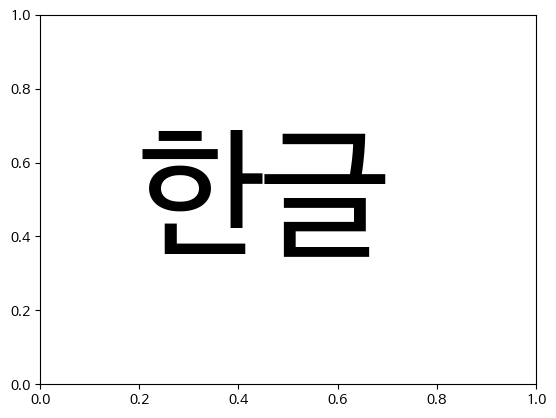

In [14]:
# 리눅스용 폰트 경로 설정
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist
plt.rc('font', family="NanumBarunGothic")
plt.text(0.2,0.4,'한글',size=100)

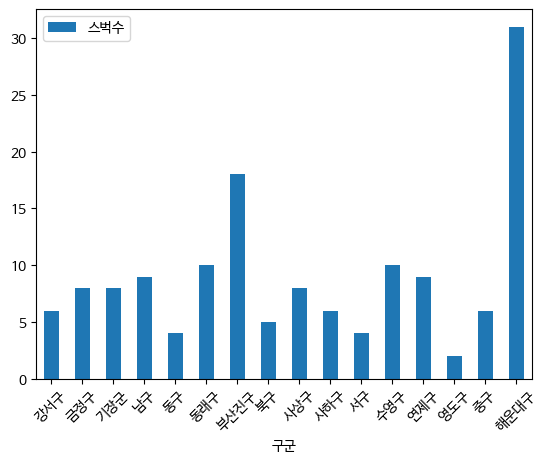

In [19]:
star_sum = star_data.groupby('구군')['구군'].count().reset_index(name="스벅수")
star_sum.plot(kind='bar', x='구군', y="스벅수")
plt.xticks(rotation=45)
plt.show()

In [16]:
star_sum

,구군,스벅수
0,강서구,6
1,금정구,8
2,기장군,8
3,남구,9
4,동구,4
5,동래구,10
6,부산진구,18
7,북구,5
8,사상구,8
9,사하구,6


In [18]:
total =pd.merge(ingu_data, star_sum, on='구군', how = 'left')
total = total.rename(columns={"인구수(명)":"인구수"})
total

,구군,인구수,스벅수
0,해운대구,385618,31
1,부산진구,362505,18
2,사하구,302947,6
3,북구,275773,5
4,동래구,272178,10
5,남구,260899,9
6,금정구,220286,8
7,사상구,208794,8
8,연제구,206853,9
9,기장군,181475,8


부산 산업대분류, 읍·면·동별 사업체수, 종사자수 <br>
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1K52C01_21&conn_path=I2

In [20]:
biz_path = "./부산광역시구분별사업체수종사자수_2020.csv"
biz_data = pd.read_csv(biz_path, encoding="EUC-KR")
biz_data.columns = ['year','구군','type1','사업체수','종사자수']
biz = biz_data[['구군','사업체수','종사자수']]
biz

,구군,사업체수,종사자수
0,중구,17407,69849
1,서구,11146,46204
2,동구,17620,78014
3,영도구,11843,47016
4,부산진구,44530,174656
5,동래구,28059,96526
6,남구,23686,89505
7,북구,20780,65424
8,해운대구,40668,157466
9,사하구,29208,112556


In [21]:
total_m1 = pd.merge(total, biz, on='구군', how='left')
total_m1

,구군,인구수,스벅수,사업체수,종사자수
0,해운대구,385618,31,40668,157466
1,부산진구,362505,18,44530,174656
2,사하구,302947,6,29208,112556
3,북구,275773,5,20780,65424
4,동래구,272178,10,28059,96526
5,남구,260899,9,23686,89505
6,금정구,220286,8,26080,96451
7,사상구,208794,8,35210,120962
8,연제구,206853,9,24131,97402
9,기장군,181475,8,18994,85019


In [23]:
# GPS정보로 지도에 표시하기
gps_path ="./gps_test.csv"
gps = pd.read_csv(gps_path,encoding="utf-8")
gps

,주소,Latitude,Longitude
0,부산광역시 해운대구,35.171946,129.174104
1,부산광역시 부산진구,35.165249,129.043031
2,부산광역시 사하구,35.089940,128.974488
3,부산광역시 북구,35.201183,128.998162
4,부산광역시 동래구,35.201753,129.083798
5,부산광역시 남구,35.125433,129.094277
6,부산광역시 금정구,35.258892,129.091536
7,부산광역시 사상구,35.158027,128.986590
8,부산광역시 연제구,35.186144,129.081633
9,부산광역시 기장군,35.297975,129.200920


In [26]:
# !pip install folium

In [25]:
import folium
coordinates = gps[['Latitude','Longitude']].to_numpy()
place = gps['주소'].to_numpy()

# 중심좌표 설정(기본위치)
center_lat , center_lon = 35.17574571 , 129.0817409

# 지도생성
m = folium.Map(location=[center_lat , center_lon], zoom_start=12 )


for i, (lat, lon) in enumerate(coordinates):
    folium.CircleMarker(
        location=[lat , lon],
        radius = 30,
        color= 'orange',
        weight=1,  # 테두리 굵기 (기본값: 2)
        opacity=0.5,  # 테두리 투명도 (0.0 ~ 1.0)
        fill = True,
        fill_color = 'yellow',
        fill_opacity = 0.6,
        tooltip = place[i]
    ).add_to(m) # 지도 생성 후 원을 그리고 지도에 붙임

    folium.Marker(
        location = [lat + 0.001, lon],
        icon = folium.DivIcon(f'<div style="font-size: 9px; color: black; background-color: white; width:50px; white-space: nowrap; overflow: hidden; text-overflow: ellipsis; opactiy:0.7; border-radius:5px">{place[i]}</div>')
    ).add_to(m)
    
m

In [45]:
# !pip install geopandas
# !pip install --upgrade pyproj

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### 주소를 가지고 위도 / 경도 값 얻어오기(GPS 정보 얻기) 2

In [48]:
import geopandas as gpd
import pandas as pd
gdf = gpd.read_file("./LARD_ADM_SECT_SGG_26_202502.shp",encoding='cp949')

# 현재 좌표계 확인
print(f"현재 좌표계: {gdf.crs}")

# WSG84 좌표계로 변환 (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)
coordinates=[]
for idx, row in gdf.iterrows():
    latitude = row. geometry. centroid.y
    longitude = row. geometry. centroid.x
    coordinates. append([row['SGG_NM' ],latitude, longitude])
    print(f"{row['SGG_NM']}의 중심점 좌표: 위도 {latitude}, 경도 {longitude}")

geo = pd.DataFrame(coordinates)
geo. columns=[ '구군', '위도', '경도']
geo[ '구군']=geo['구군'].str.replace( '부산광역시 ','')
geo

현재 좌표계: EPSG:5186
사하구의 중심점 좌표: 위도 35.0889194071921, 경도 128.97407315568043
사상구의 중심점 좌표: 위도 35.158031116682515, 경도 128.98659031360012
동래구의 중심점 좌표: 위도 35.206208880252035, 경도 129.0792284050886
금정구의 중심점 좌표: 위도 35.25890883122911, 경도 129.09153202135272
연제구의 중심점 좌표: 위도 35.18240414750452, 경도 129.08296158029694
수영구의 중심점 좌표: 위도 35.16131959123051, 경도 129.11120194341635
부산진구의 중심점 좌표: 위도 35.16524570644573, 경도 129.04306325438392
해운대구의 중심점 좌표: 위도 35.19385029958893, 경도 129.15360577298307
중구의 중심점 좌표: 위도 35.1056054149738, 경도 129.03238836761827
남구의 중심점 좌표: 위도 35.125558325964256, 경도 129.0942822375191
동구의 중심점 좌표: 위도 35.12852045647495, 경도 129.0447575551209
영도구의 중심점 좌표: 위도 35.07868888856651, 경도 129.06480616179286
북구의 중심점 좌표: 위도 35.229261000621804, 경도 129.02346479725313
기장군의 중심점 좌표: 위도 35.297996279477196, 경도 129.20094112382552
서구의 중심점 좌표: 위도 35.10292316043582, 경도 129.01492725751888
강서구의 중심점 좌표: 위도 35.13835307158759, 경도 128.89244374229375


,구군,위도,경도
0,사하구,35.088919,128.974073
1,사상구,35.158031,128.986590
2,동래구,35.206209,129.079228
3,금정구,35.258909,129.091532
4,연제구,35.182404,129.082962
5,수영구,35.161320,129.111202
6,부산진구,35.165246,129.043063
7,해운대구,35.193850,129.153606
8,중구,35.105605,129.032388
9,남구,35.125558,129.094282


### 주소를 가지고 위도 / 경도 값 얻어오기(GPS 정보 얻기) 3

In [52]:
# !pip install geopy

In [51]:
from geopy.geocoders import Nominatim

loc = "부산광역시 남구 대연동 1673"
geolocator = Nominatim(user_agent="geoapi")
location = geolocator.geocode(loc)
print(location.latitude, location.longitude)

35.1343823 129.0938404


In [53]:
last= pd.merge(total_m1, geo, on="구군", how="left")
last.info()
last.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구군      16 non-null     object 
 1   인구수     16 non-null     int64  
 2   스벅수     16 non-null     int64  
 3   사업체수    16 non-null     int64  
 4   종사자수    16 non-null     int64  
 5   위도      16 non-null     float64
 6   경도      16 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.0+ KB


,구군,인구수,스벅수,사업체수,종사자수,위도,경도
9,기장군,181475,8,18994,85019,35.297996,129.200941
14,동구,90190,4,17620,78014,35.128520,129.044758
8,연제구,206853,9,24131,97402,35.182404,129.082962
6,금정구,220286,8,26080,96451,35.258909,129.091532
3,북구,275773,5,20780,65424,35.229261,129.023465


In [54]:
import geopandas as gpd
import json 

In [55]:
geojson = gdf.to_json()

In [56]:
import folium
location_mean = last[["위도","경도"]].mean()
print(location_mean)

위도     35.163862
경도    129.055642
dtype: float64


In [62]:
def style_func(feature):
    return {'opacity' :0.7, 'weight' :1.5, 'color' : 'red', 'fillOpacity' :0, 'dashArray' : '5,5'}
    # opacity 투명도를 설정
    # weight 외곽선의 두께를 설정
    # color 경계선의 색상
    # fillopacity 면적을 채우는 색상의 투명도를 설정
    # dashArray 'dashArray': '5,5'는 5px 길이의 선과 5px 길이의 간격을 반복

sb_bubble = folium.Map(location= list(location_mean), tiles= 'CartoDB Positron', zoom_start=12) # Positron, Voyager, Dark Matter
folium.GeoJson(geojson, style_function=style_func).add_to(sb_bubble)

# 지도 출력 확인
sb_bubble

In [66]:
sb_mean = last['스벅수'].mean()
sb_mean

np.float64(9.0)

In [67]:
def style_func(feature):
    return {'opacity':0.7, 'weight':1.5, 'color':'red', 'fillOpacity':0, 'dashArray':'5,5'}
sb_bubble = folium.Map(location= list(location_mean), tiles= 'CartoDB Positron', zoom_start=12) # Positron, Voyager, Dark Matter
folium.GeoJson(geojson, style_function=style_func).add_to(sb_bubble)

for i in last.index:    
    lat = float(last.loc[i, '위도'])
    lon = float(last.loc[i, '경도'])
    sb = int(last.loc[i,'스벅수'])

    if sb > sb_mean:
        fillColor = 'red'
    else:
        fillColor = 'blue'

    folium.CircleMarker(
        location=[lat,lon],
        color='yellow',
        fill_color = fillColor,
        fill_opacity=0.7,
        weight=2,
        radius=(sb*2),
     ).add_to(sb_bubble)

# 지도 출력 확인
sb_bubble

In [68]:
# 단계 구분도 시각화
# coordinates
import json
print(type(geojson))
geojson_data = json.loads(geojson)
print(type(geojson_data))
for n in range(len(geojson_data['features'])):
    print(geojson_data['features'][n]['properties']['SGG_NM'])

<class 'str'>
<class 'dict'>
사하구
사상구
동래구
금정구
연제구
수영구
부산진구
해운대구
중구
남구
동구
영도구
북구
기장군
서구
강서구


In [69]:
threshold_scale = [last['스벅수'].min(), last['스벅수'].quantile(0.25), last['스벅수'].quantile(0.5), last['스벅수'].quantile(0.75), last['스벅수'].max()]
sb_bubble2 = folium.Map(location=list(location_mean), tiles='CartoDB Voyager', zoom_start=12)

# 단계구분도시각화
folium.Choropleth(
    geo_data=geojson_data,
    data = last,
    columns=['구군','스벅수'],
    fill_color='PuBuGn',
    fill_opacity = 0.7,
    line_opacity=0.5,
    key_on ='feature.properties.SGG_NM',
    threshold_scale = threshold_scale,
    legend_name = "스타벅스 수"
).add_to(sb_bubble2)

sb_bubble2